# Computer Vision Final Project
### Animan Alloua Yann
### Aseem Mishra

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset1/classes.txt
/kaggle/input/dataset1/classes.names
/kaggle/input/dataset1/test/labels/200.txt
/kaggle/input/dataset1/test/labels/503.txt
/kaggle/input/dataset1/test/labels/501.txt
/kaggle/input/dataset1/test/labels/304.txt
/kaggle/input/dataset1/test/labels/202.txt
/kaggle/input/dataset1/test/labels/400.txt
/kaggle/input/dataset1/test/labels/401.txt
/kaggle/input/dataset1/test/labels/203.txt
/kaggle/input/dataset1/test/labels/402.txt
/kaggle/input/dataset1/test/labels/300.txt
/kaggle/input/dataset1/test/labels/403.txt
/kaggle/input/dataset1/test/labels/301.txt
/kaggle/input/dataset1/test/labels/302.txt
/kaggle/input/dataset1/test/labels/204.txt
/kaggle/input/dataset1/test/labels/100.txt
/kaggle/input/dataset1/test/labels/103.txt
/kaggle/input/dataset1/test/labels/500.txt
/kaggle/input/dataset1/test/labels/102.txt
/kaggle/input/dataset1/test/labels/504.txt
/kaggle/input/dataset1/test/labels/101.txt
/kaggle/input/dataset1/test/labels/404.txt
/kaggle/input/dataset1/te

### Creating data.yaml file

In [2]:
import yaml

data = {
    'train': '/kaggle/input/dataset1/train/images',
    'val': '/kaggle/input/dataset1/test/images',
    'nc': 7,
    'names': ['fist','one','two','three','four','five','y']
}

with open('data.yaml', 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)


### Cloning Git

In [3]:
!git clone https://github.com/ultralytics/yolov5.git  
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16567, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 16567 (delta 23), reused 31 (delta 13), pack-reused 16522
Receiving objects: 100% (16567/16567), 15.08 MiB | 29.82 MiB/s, done.
Resolving deltas: 100% (11380/11380), done.
/kaggle/working/yolov5


In [4]:
!pip install -qr requirements.txt  
import torch

from IPython.display import Image, clear_output  

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.
Setup complete. Using torch 2.1.2 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


In [5]:
%cat /kaggle/working/data.yaml

names:
- fist
- one
- two
- three
- four
- five
- y
nc: 7
train: /kaggle/input/dataset1/train/images
val: /kaggle/input/dataset1/test/images


In [7]:
import yaml
with open("/kaggle/working/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
num_classes

'7'

### Reading yolov5s.yaml file for current configuration

In [9]:
%cat models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [10]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

### Modifying yolov5s.yaml file for our usage

In [11]:
%%writetemplate /kaggle/working/yolov5/models/yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

### Training for 200 epochs

In [12]:
%%time
%cd /kaggle/working/yolov5
!python train.py --img 416 --batch 128 --epochs 200 --data '/kaggle/working/data.yaml' --cfg ./models/yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache


/kaggle/working/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-04-23 23:44:19.764182: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 23:44:19.764295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 23:44:19.925053: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due t

### Results

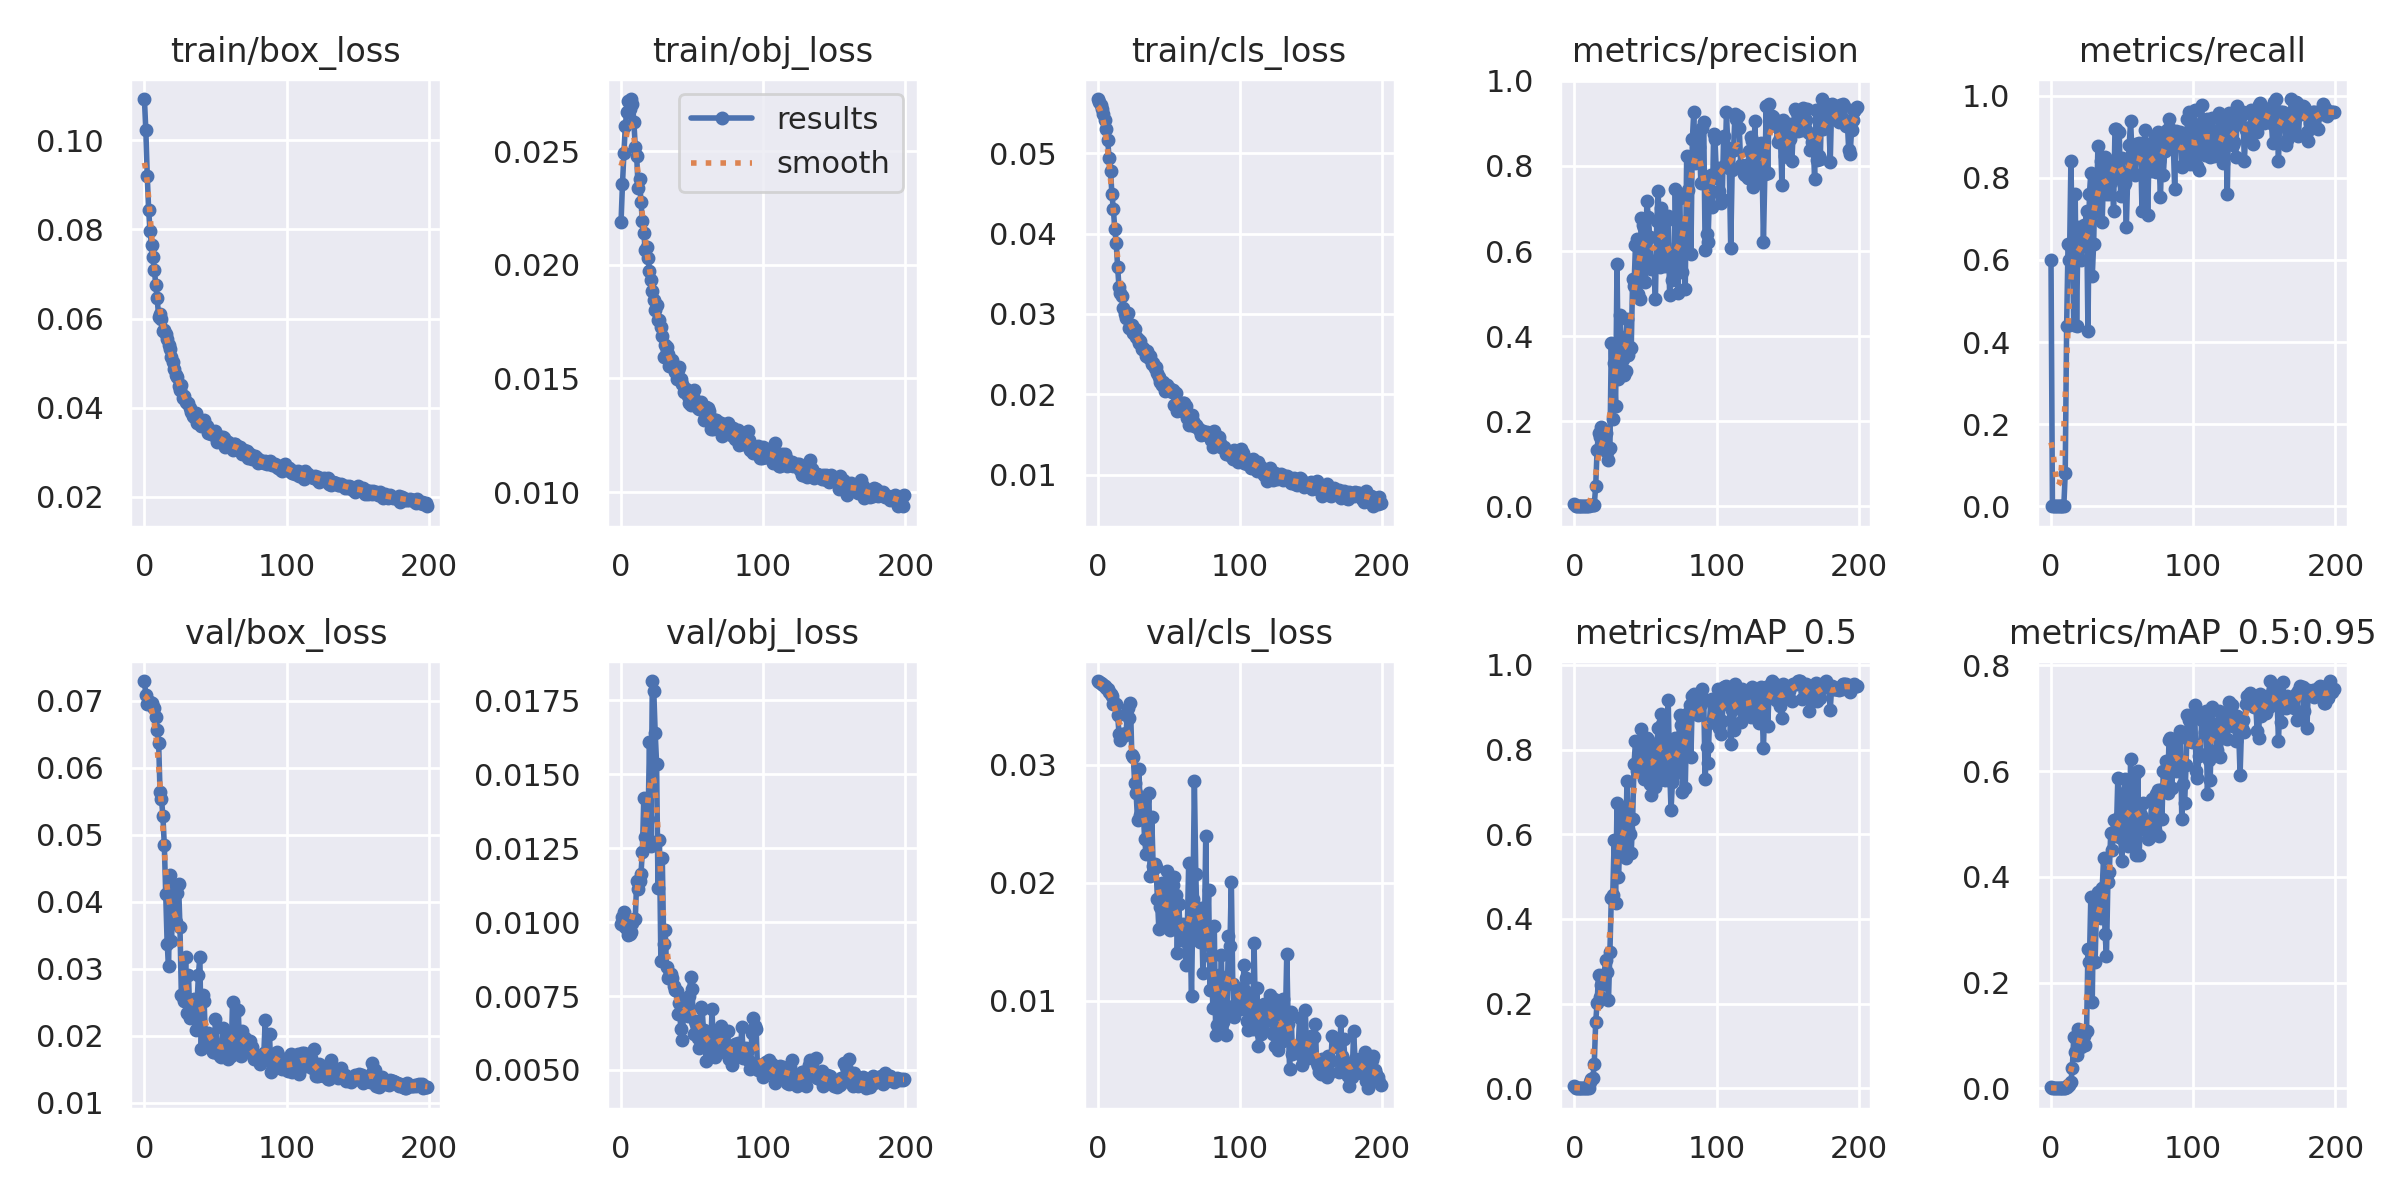

In [34]:
from utils.plots import plot_results  
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/results.png', width=1000)

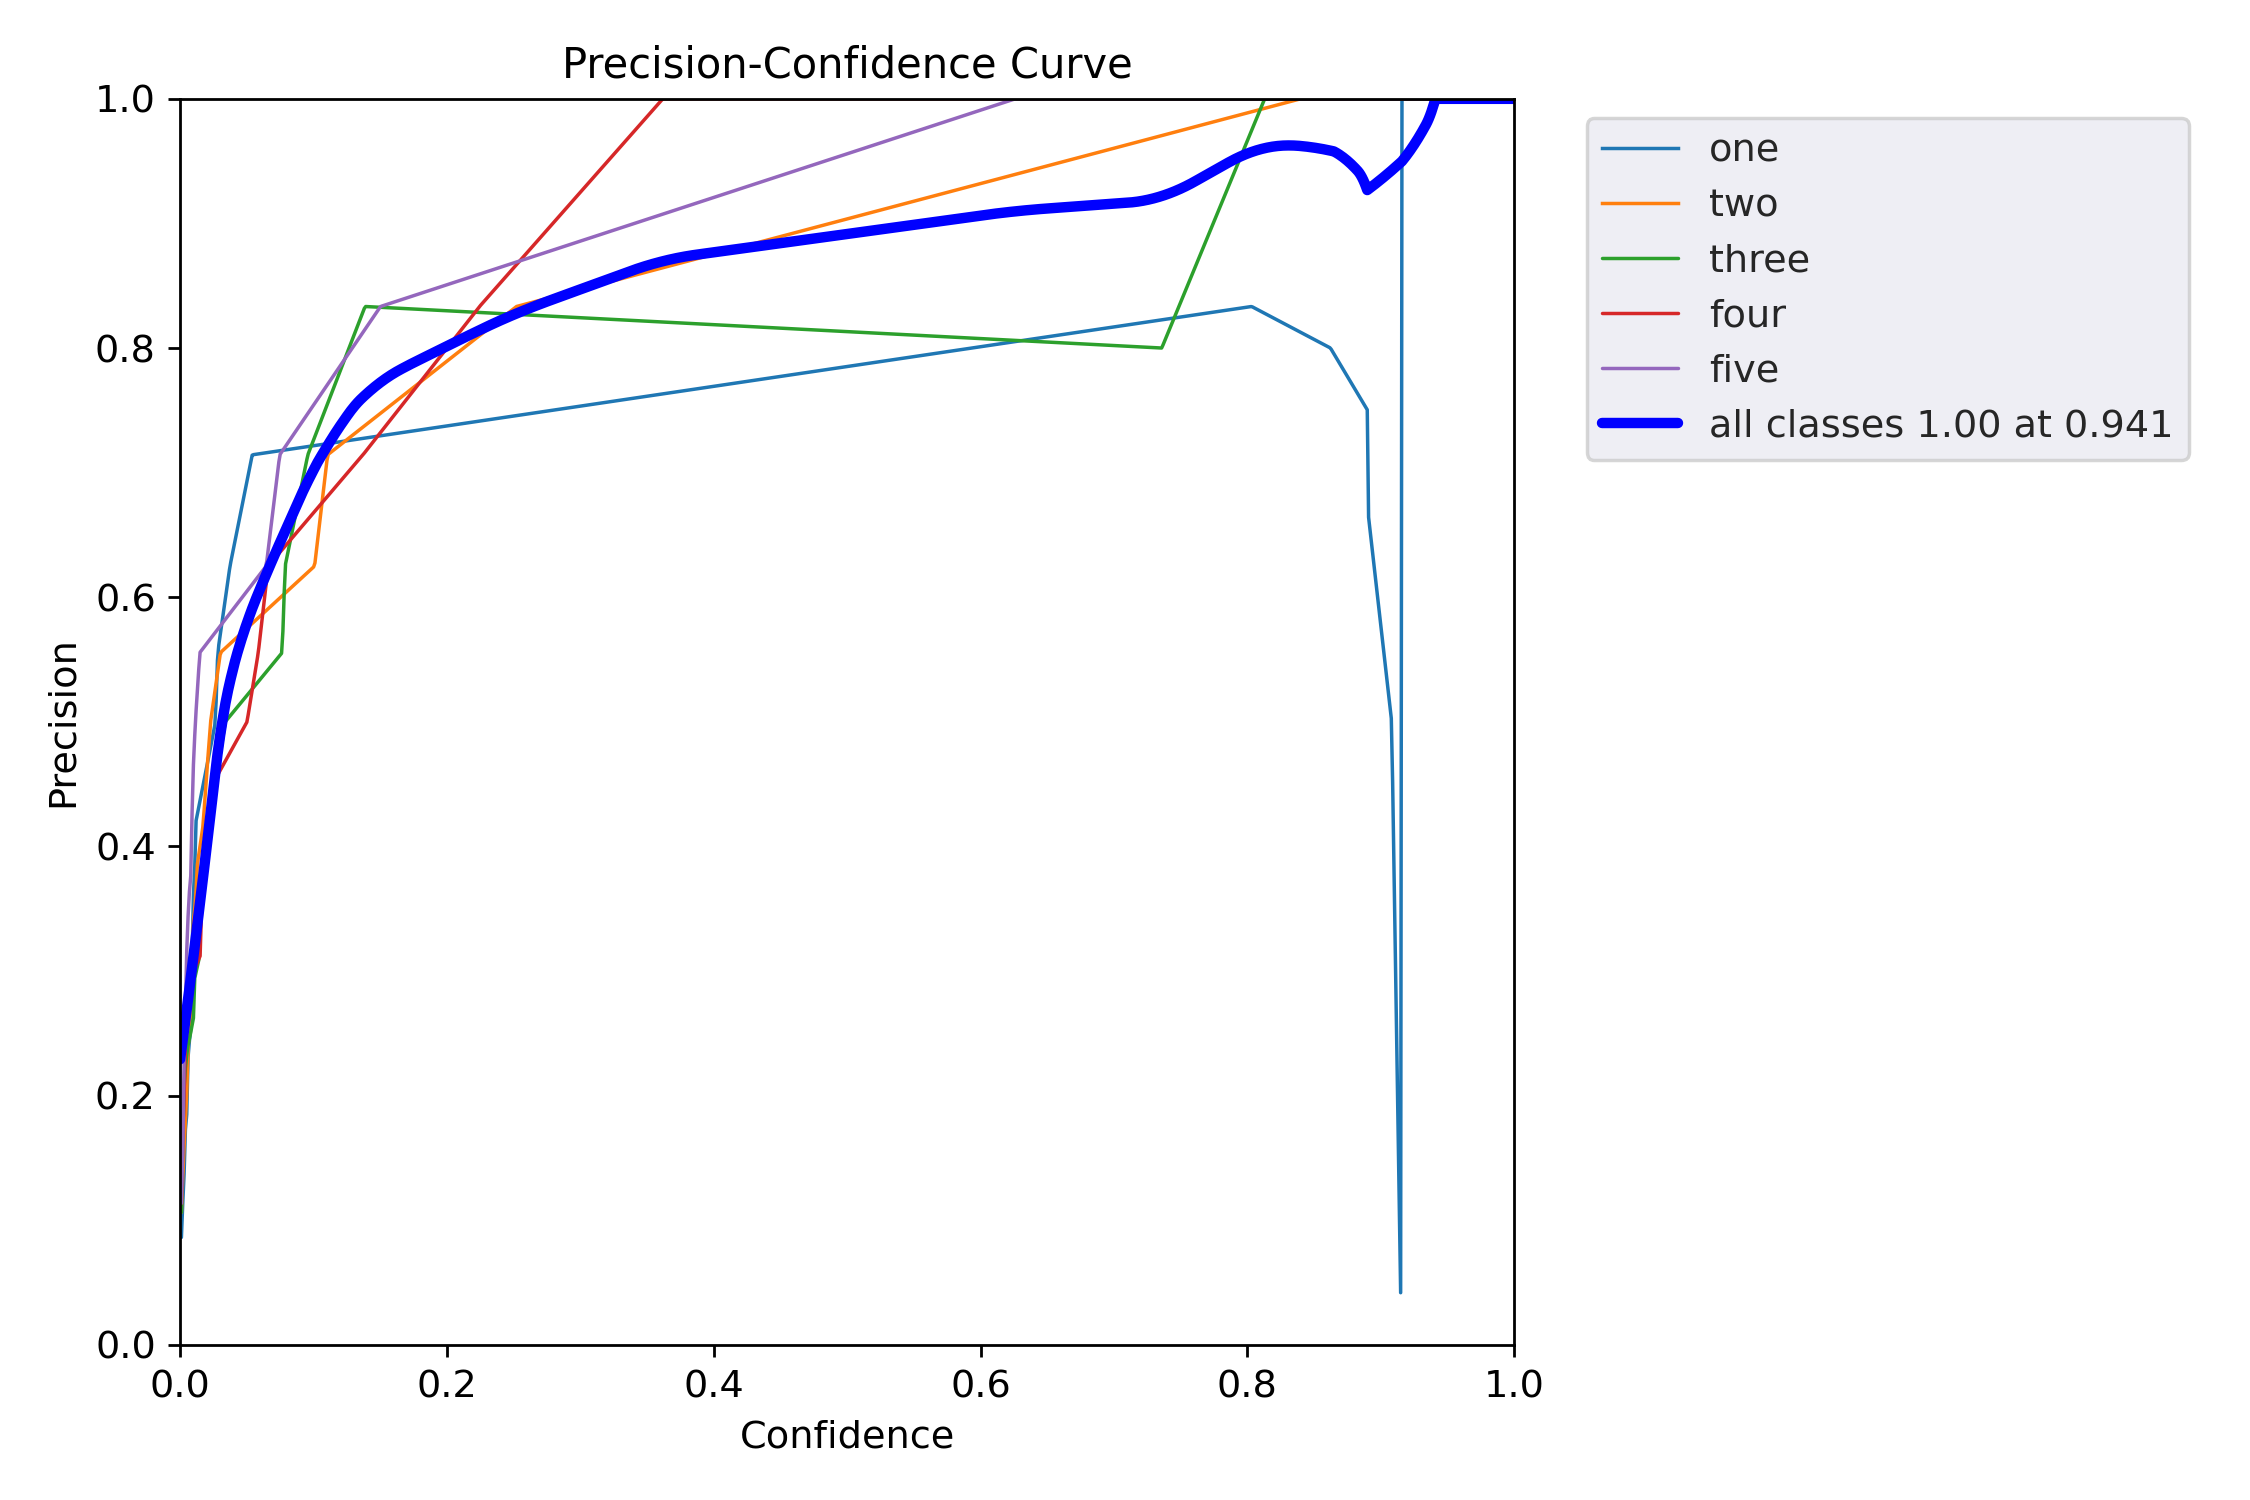

In [35]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/P_curve.png', width=1000)

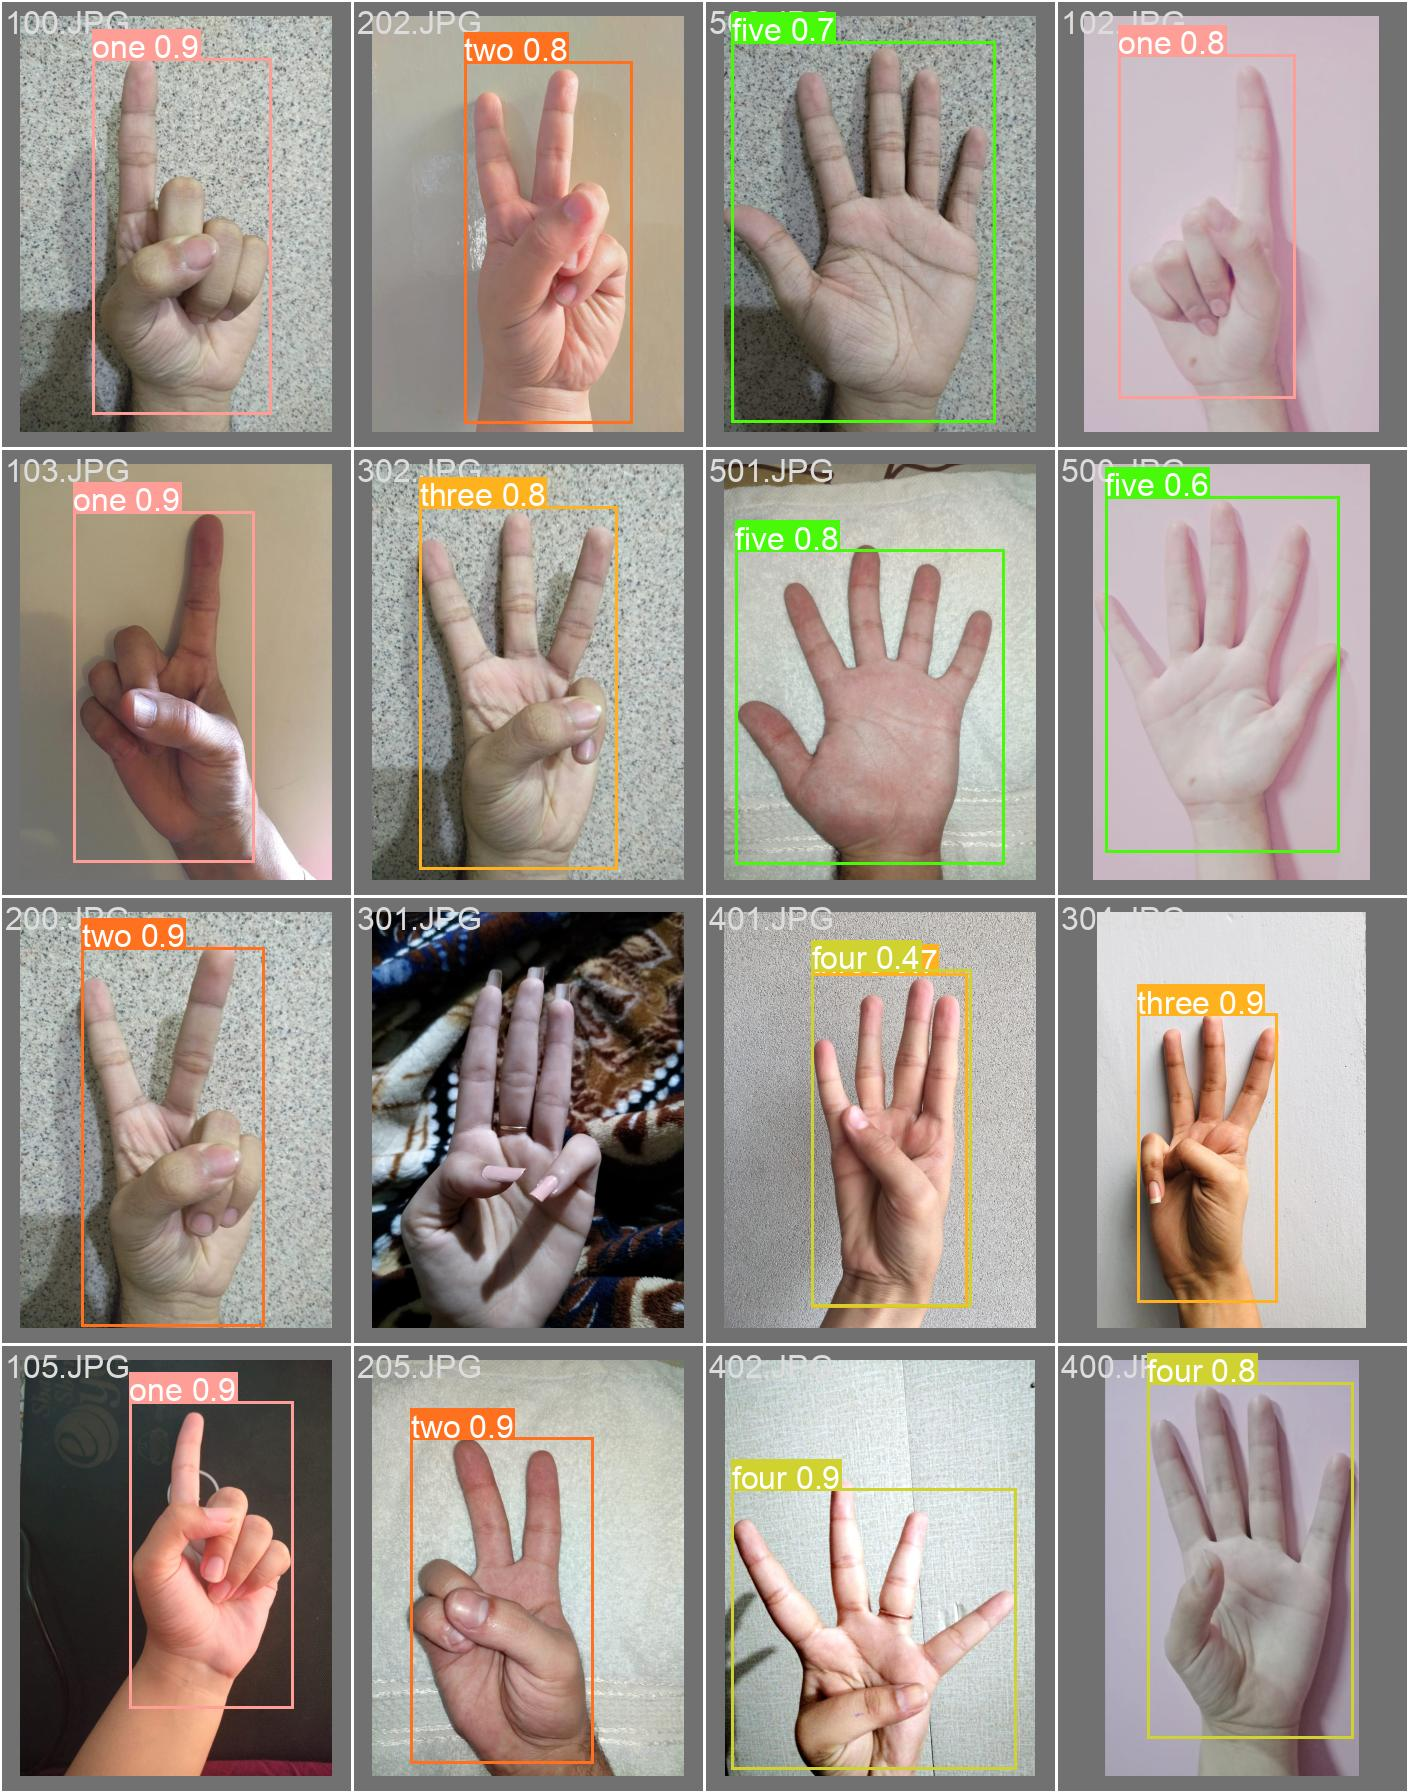

In [36]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/val_batch0_pred.jpg', width=1000)

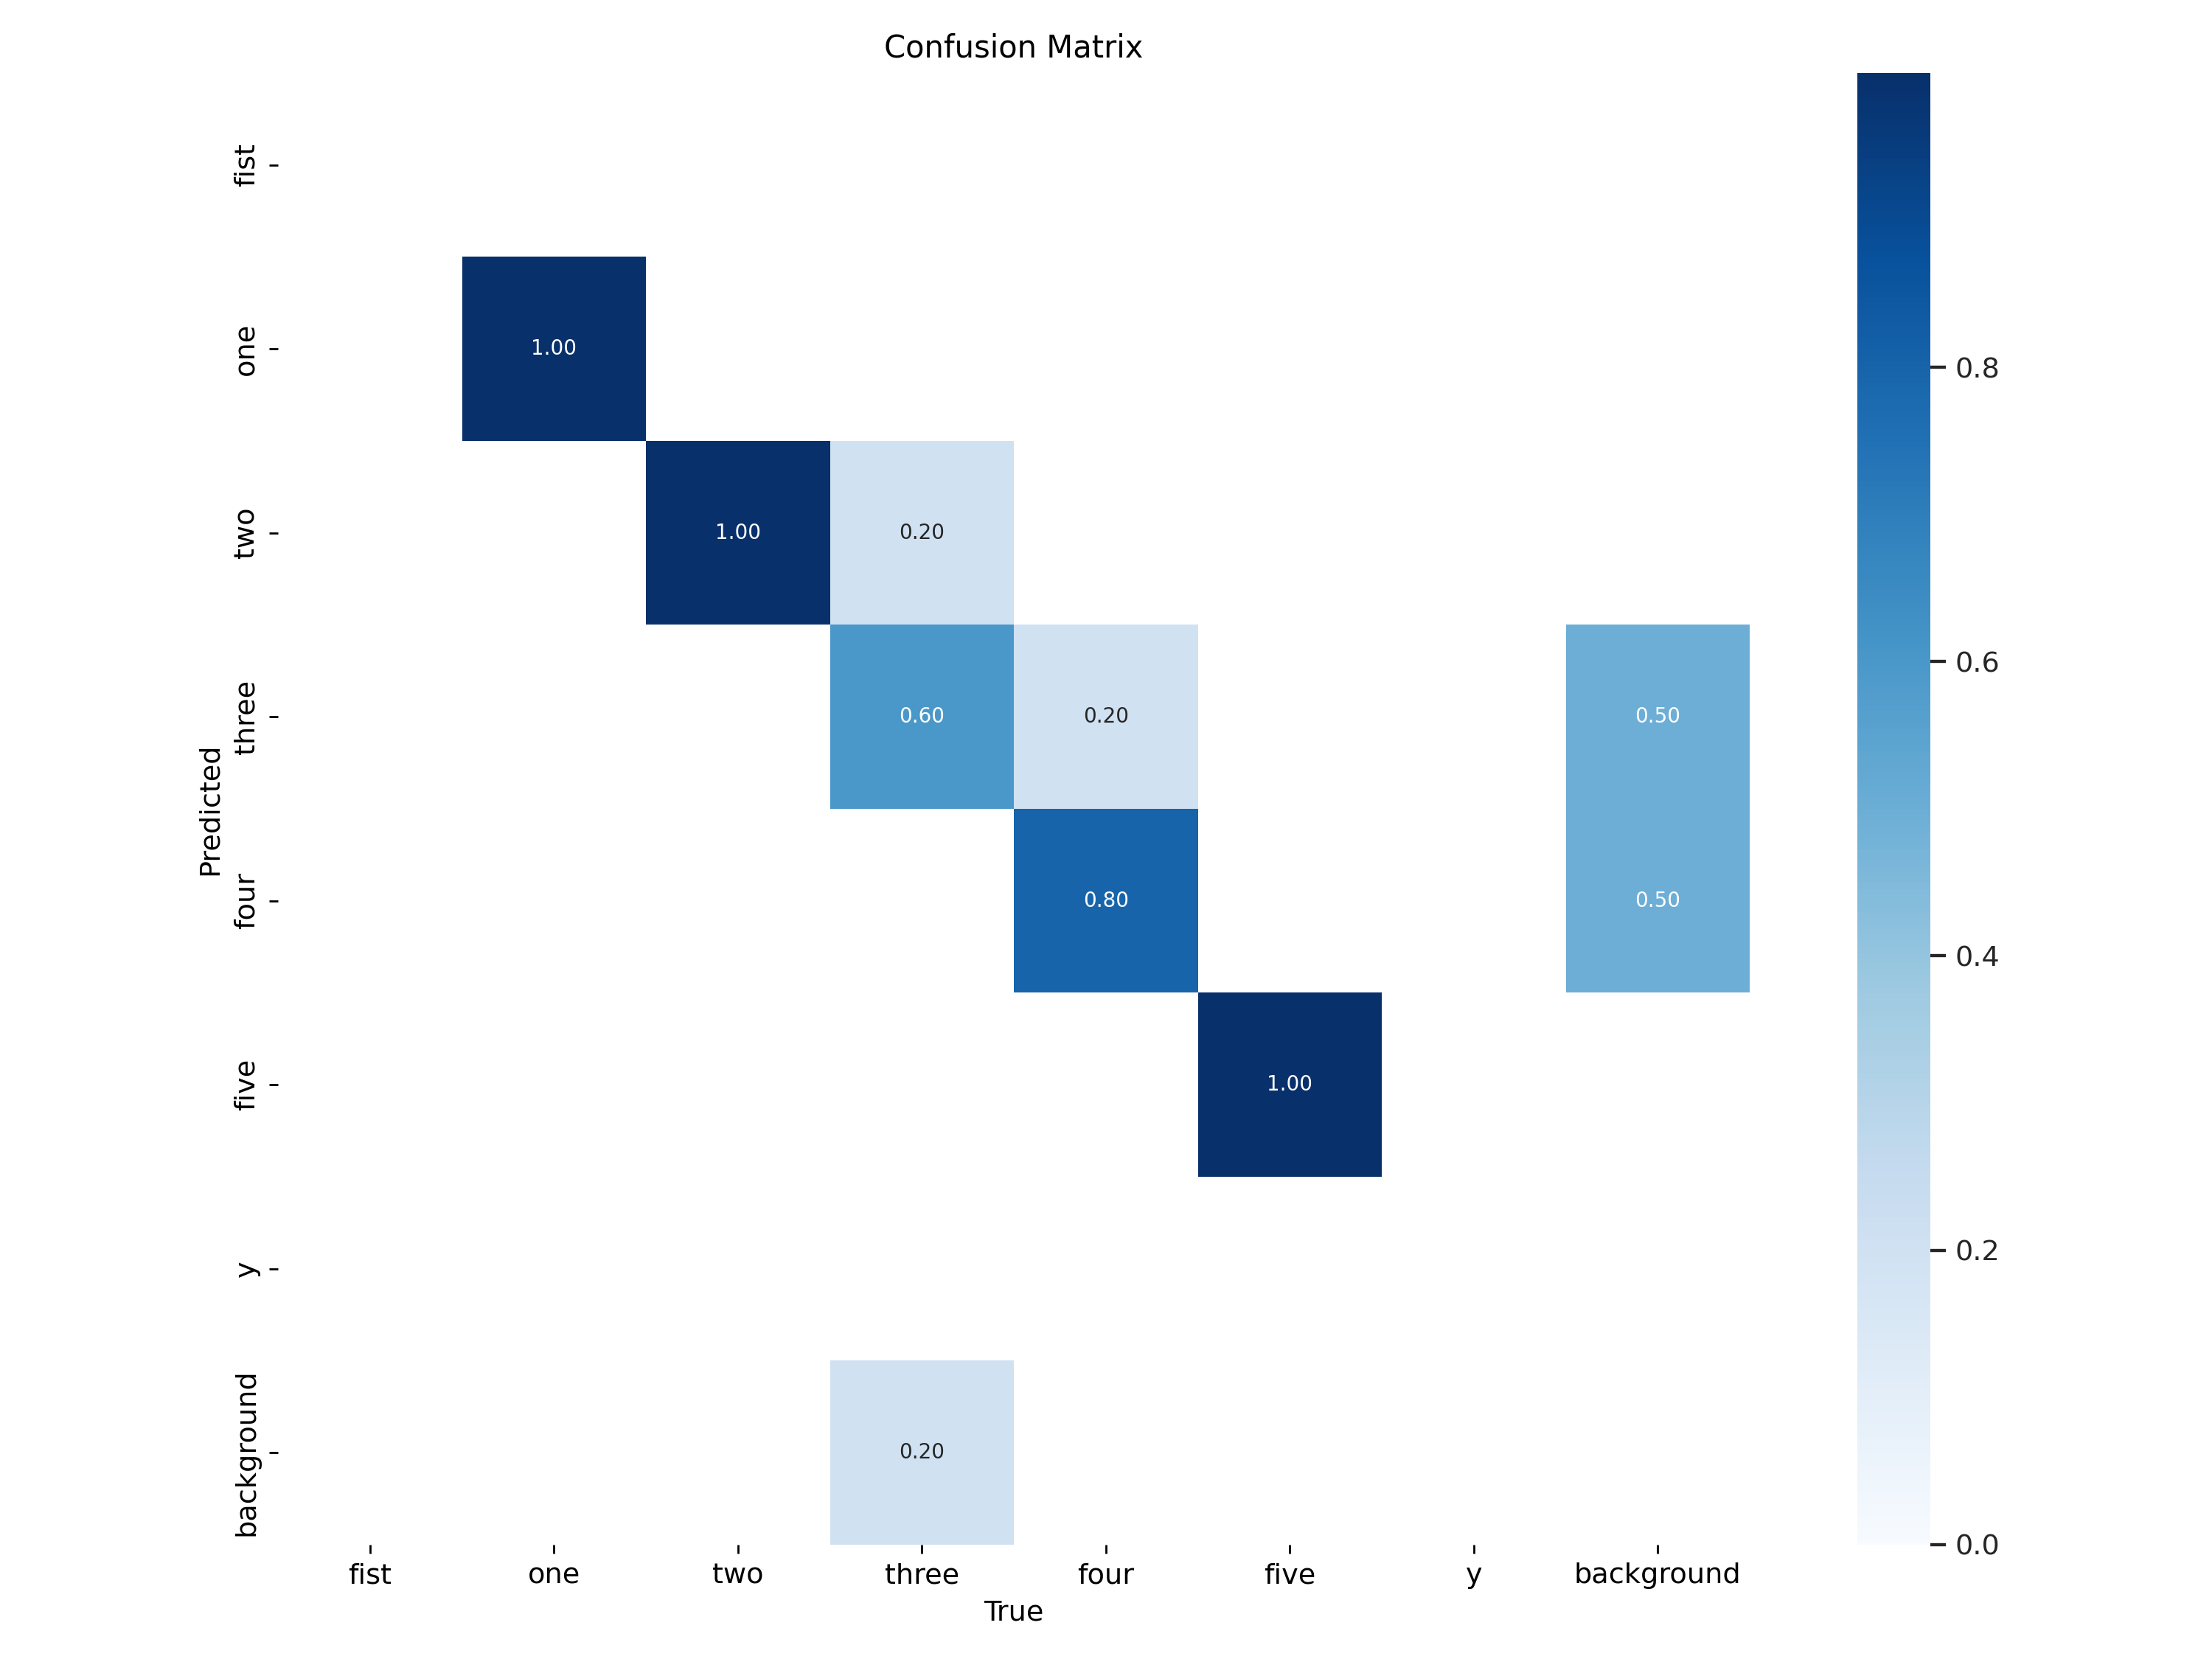

In [37]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/confusion_matrix.png', width=1000)

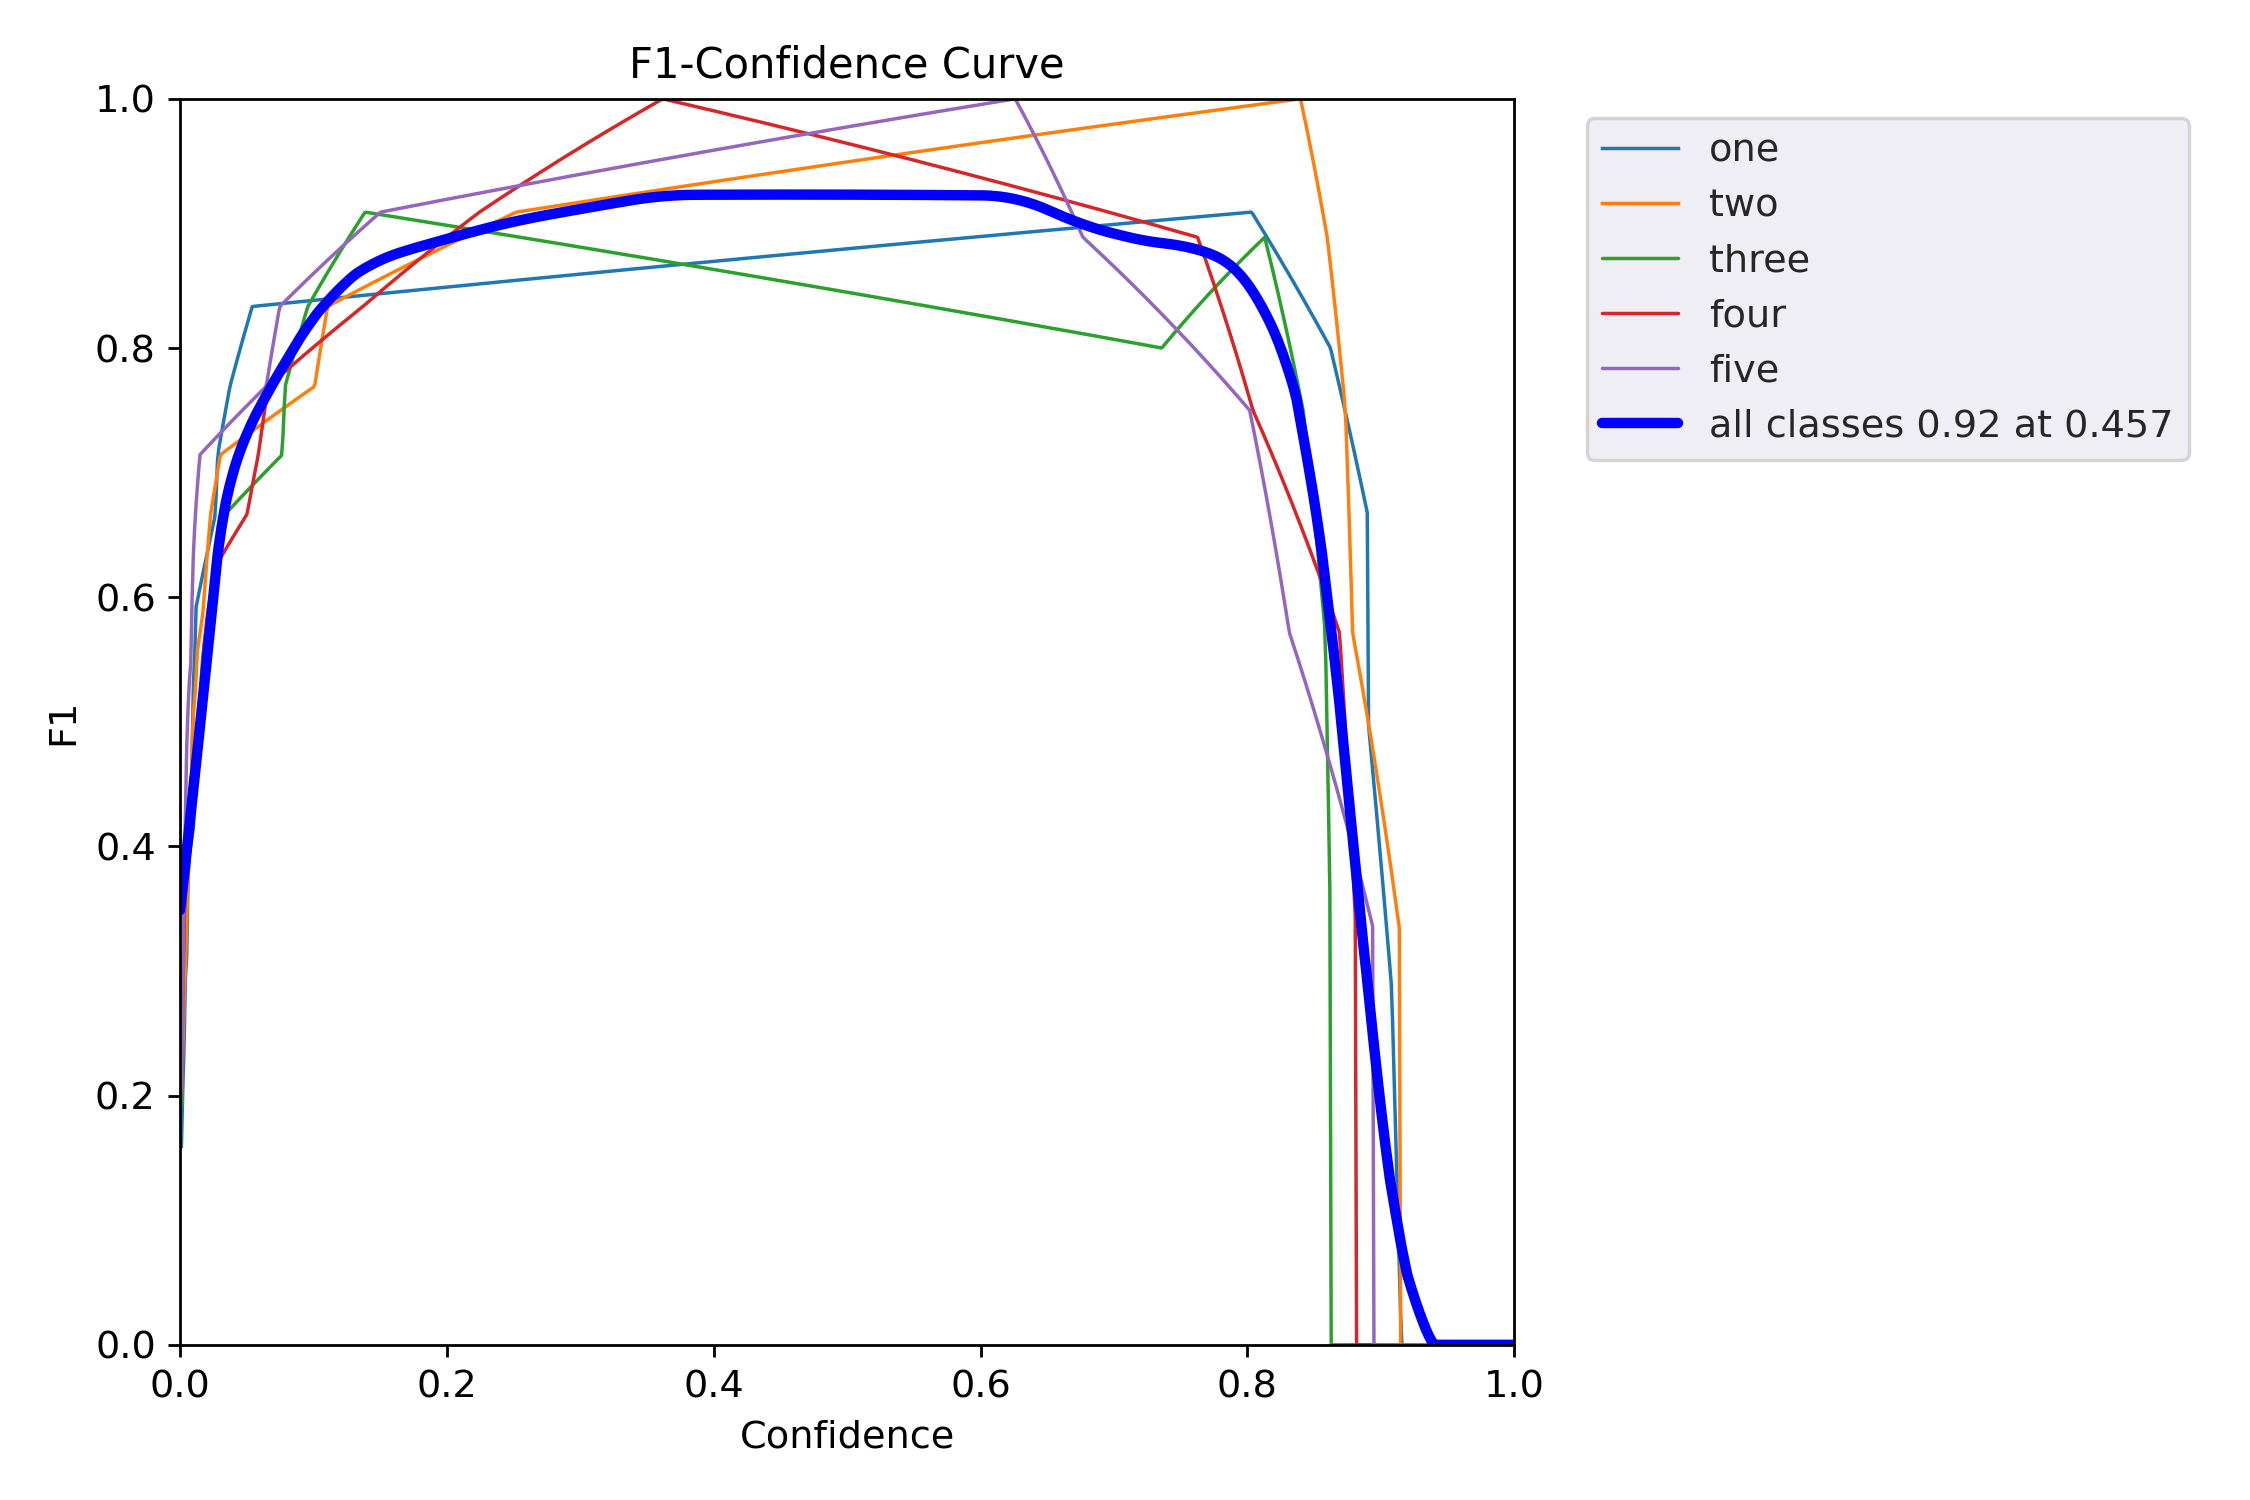

In [38]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results/F1_curve.png', width=1000)

### Training for 500 epochs

In [13]:
%%time
%cd /kaggle/working/yolov5
!python train.py --img 416 --batch 128 --epochs 500 --data '/kaggle/working/data.yaml' --cfg ./models/yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache


/kaggle/working/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-04-24 00:13:14.902853: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 00:13:14.902908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 00:13:14.904368: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due t

### Results

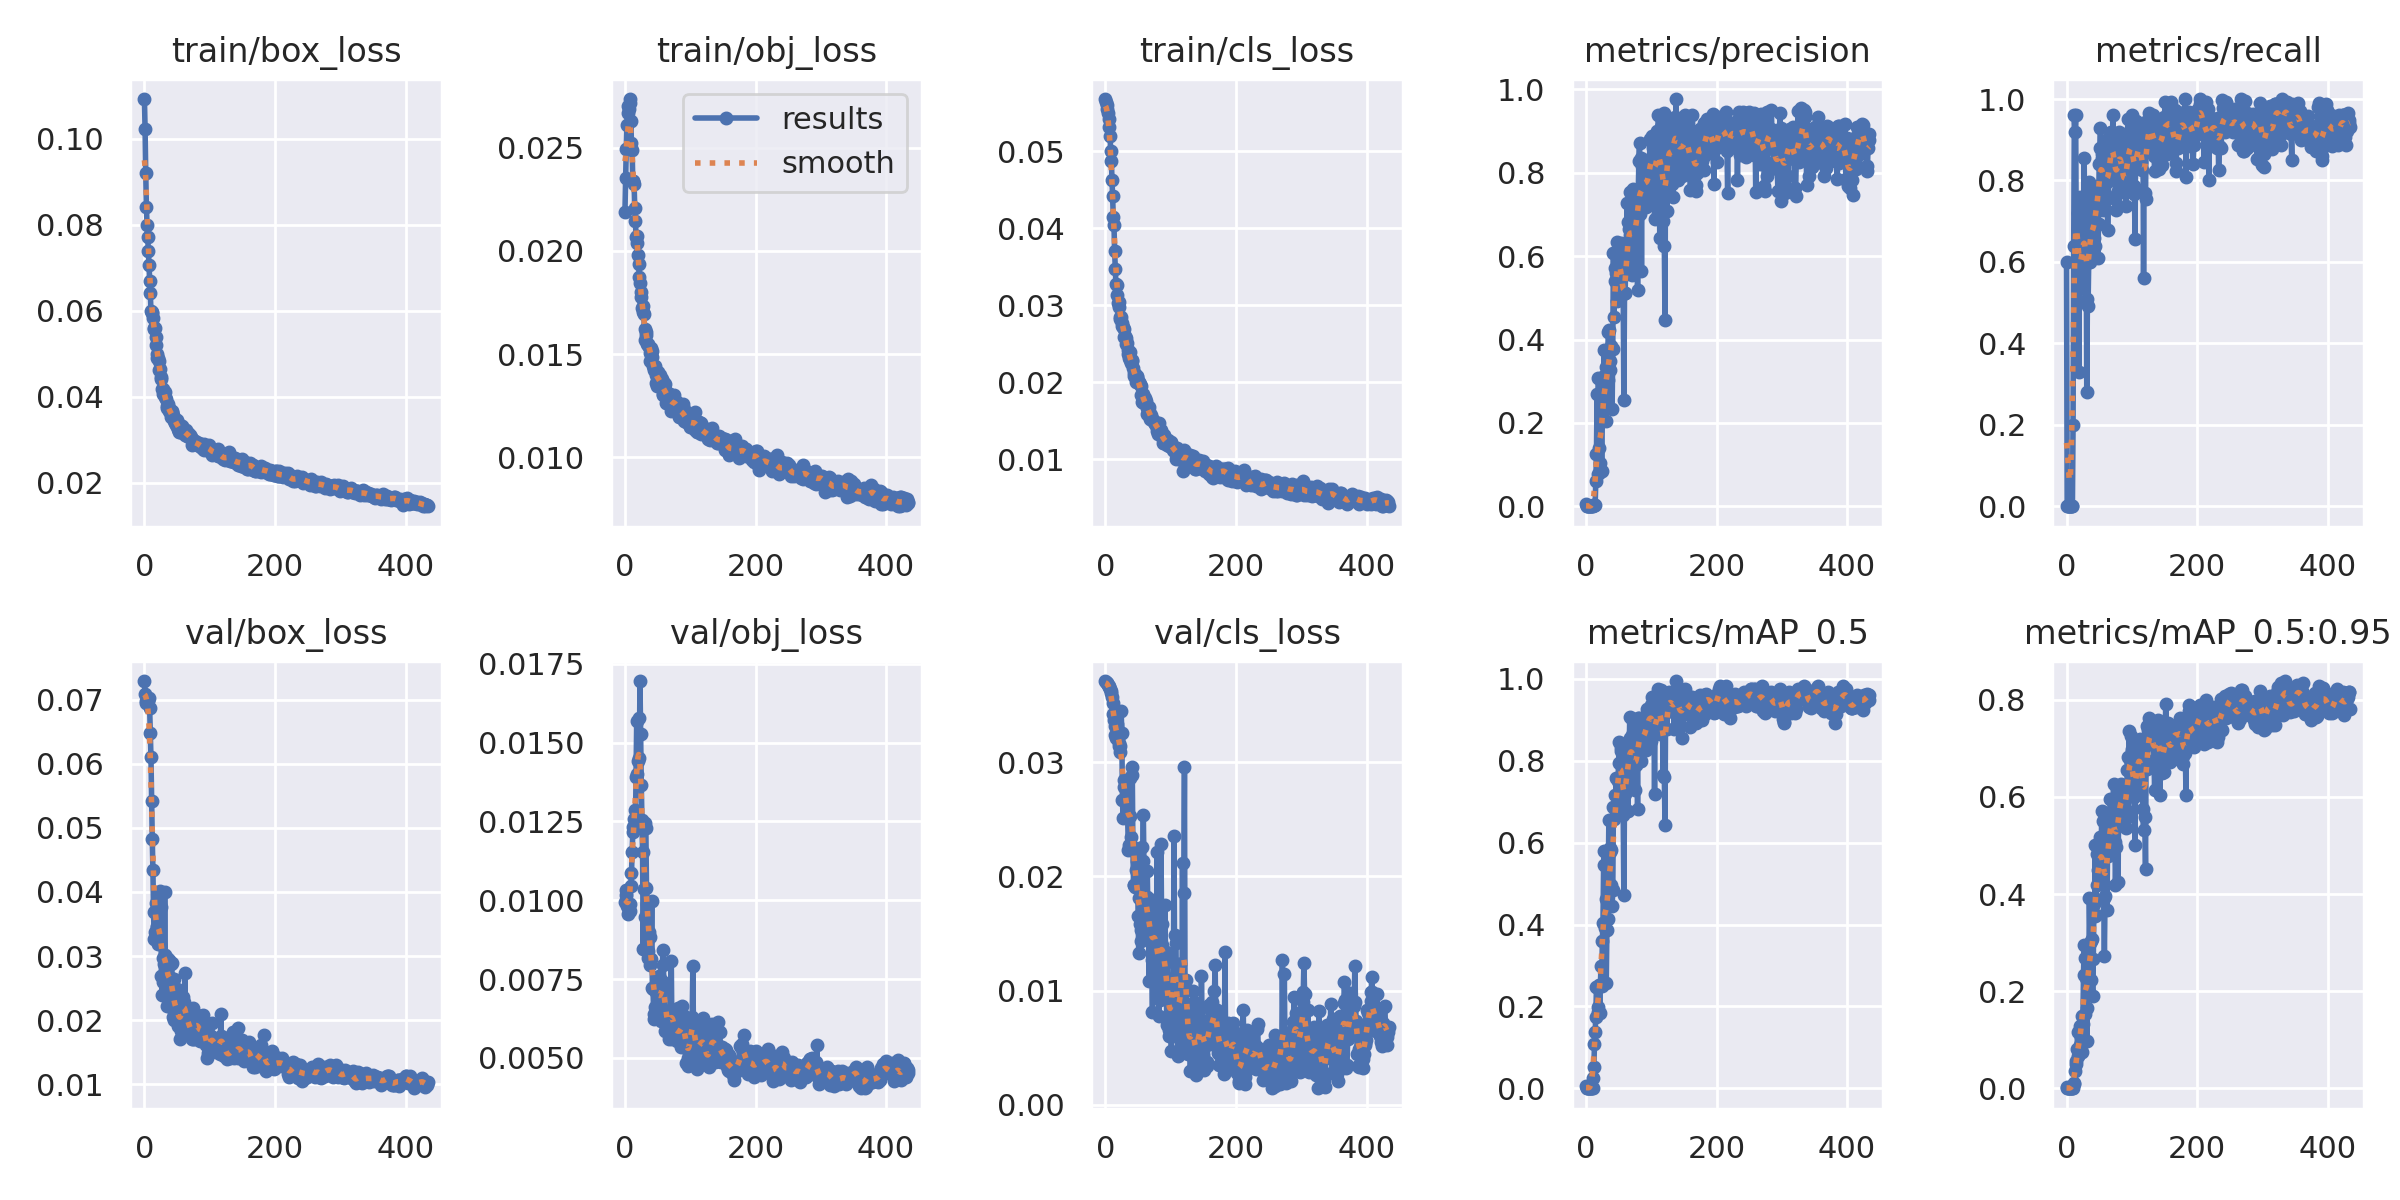

In [39]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results2/results.png', width=1000)

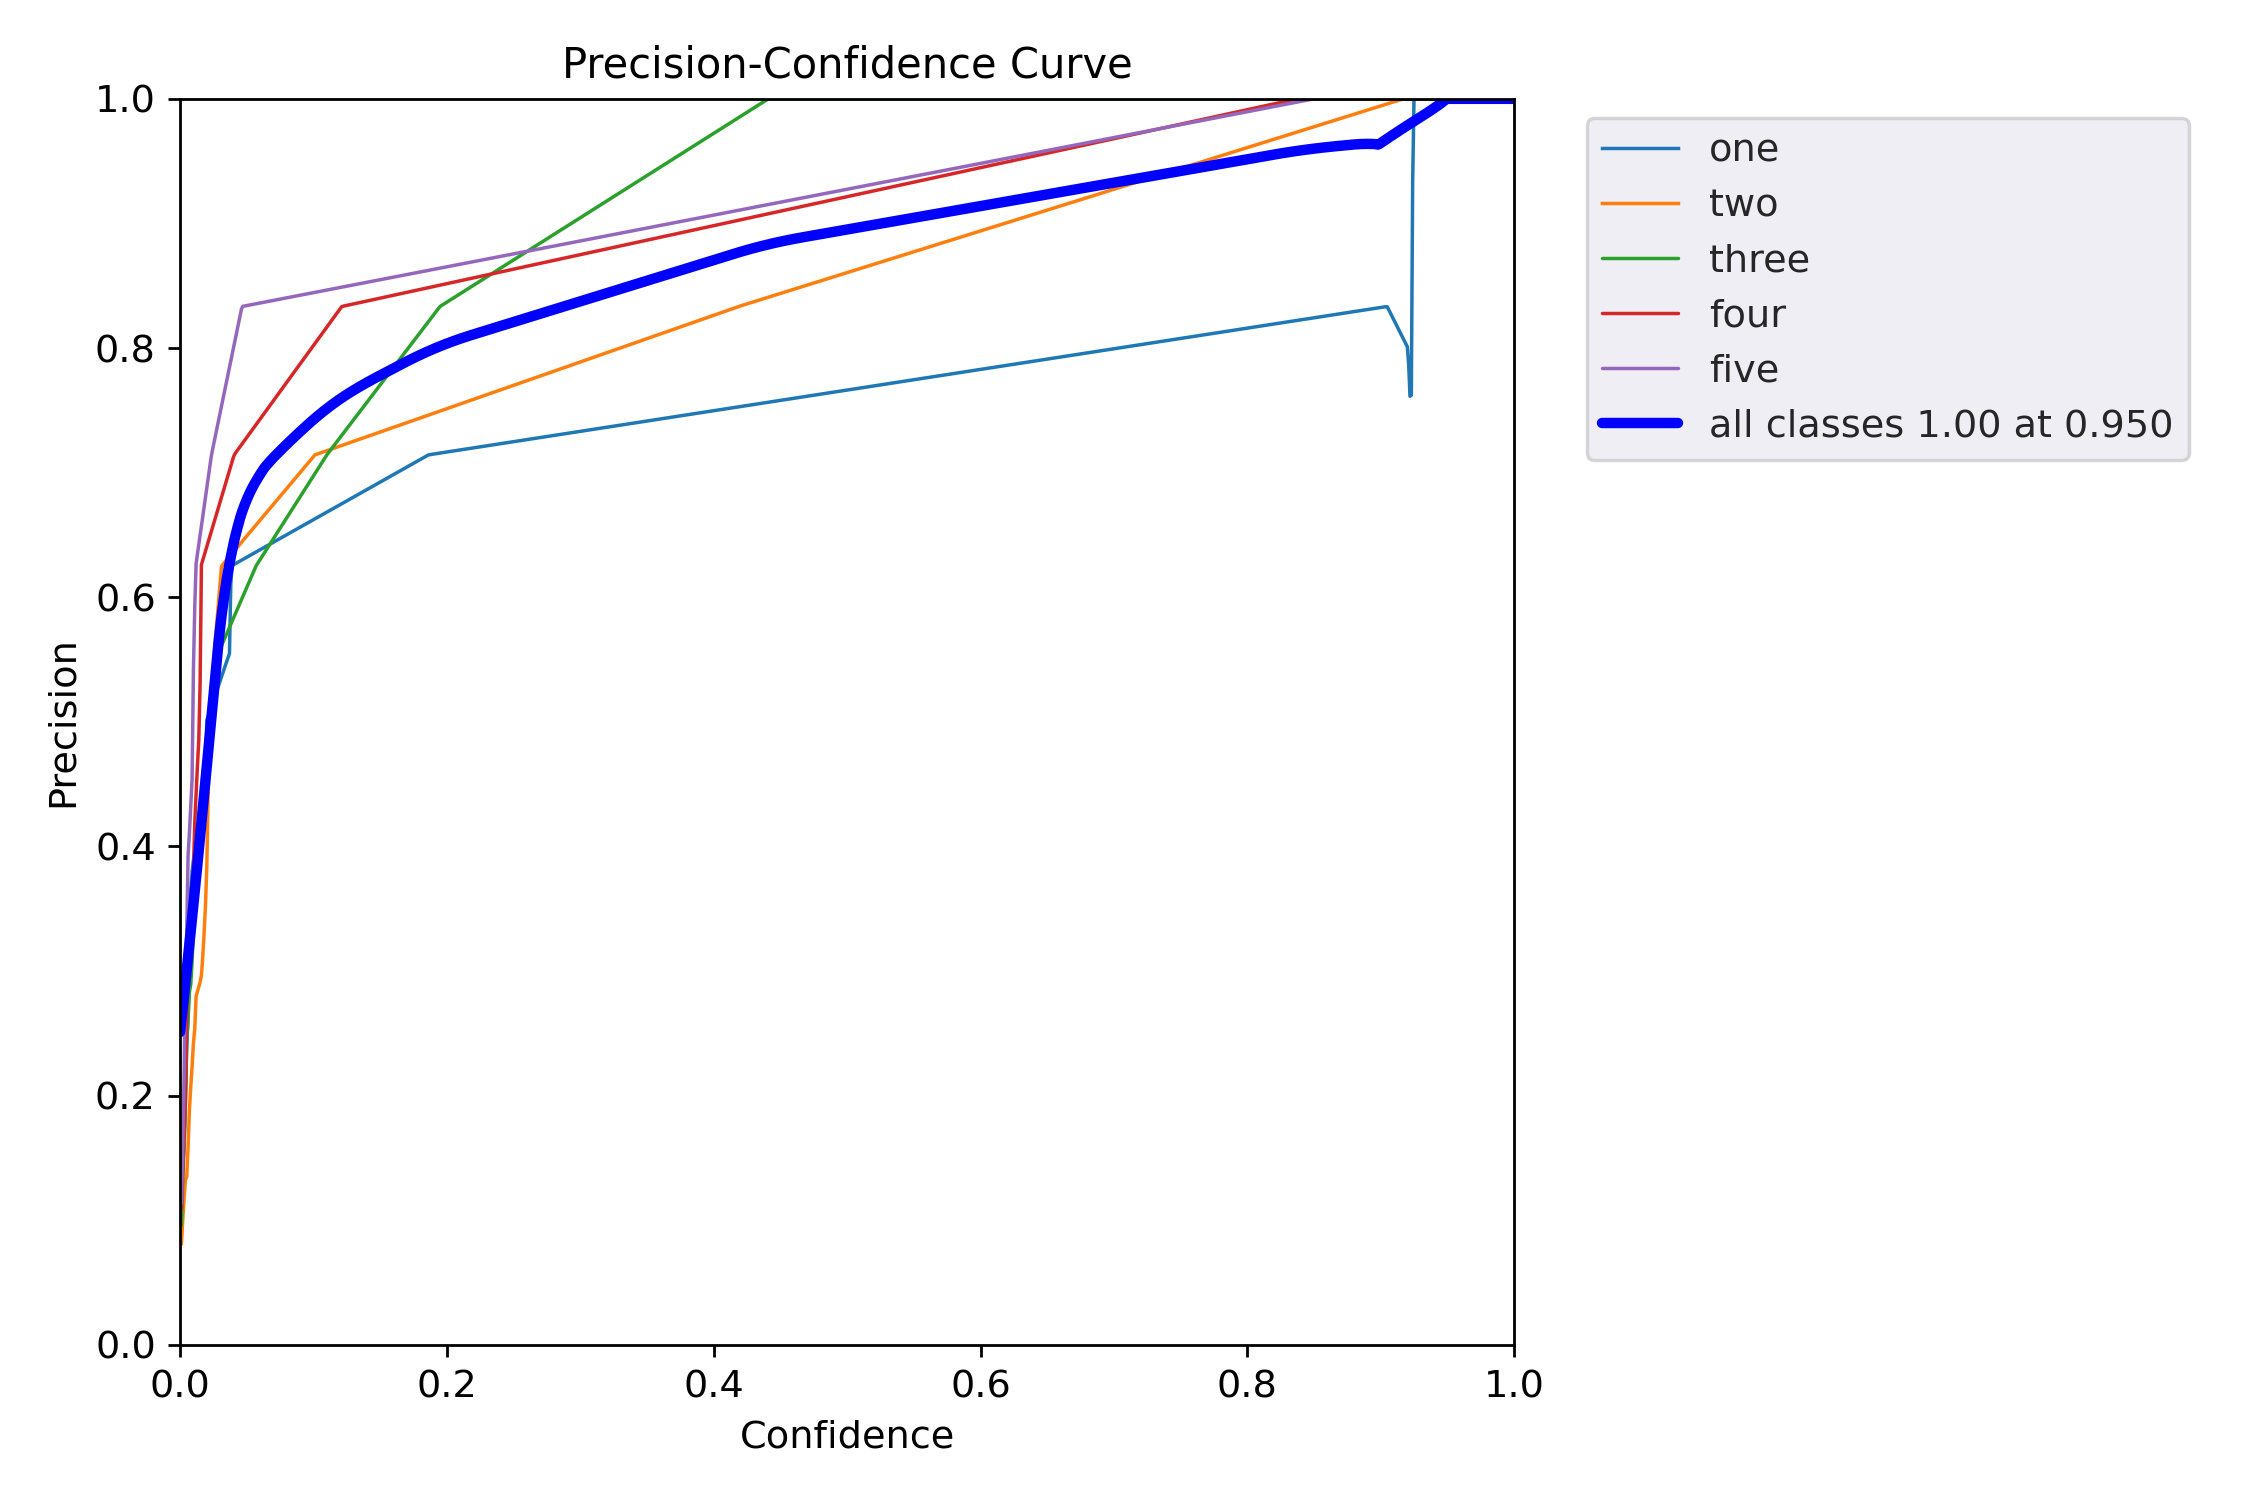

In [40]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results2/P_curve.png', width=1000)

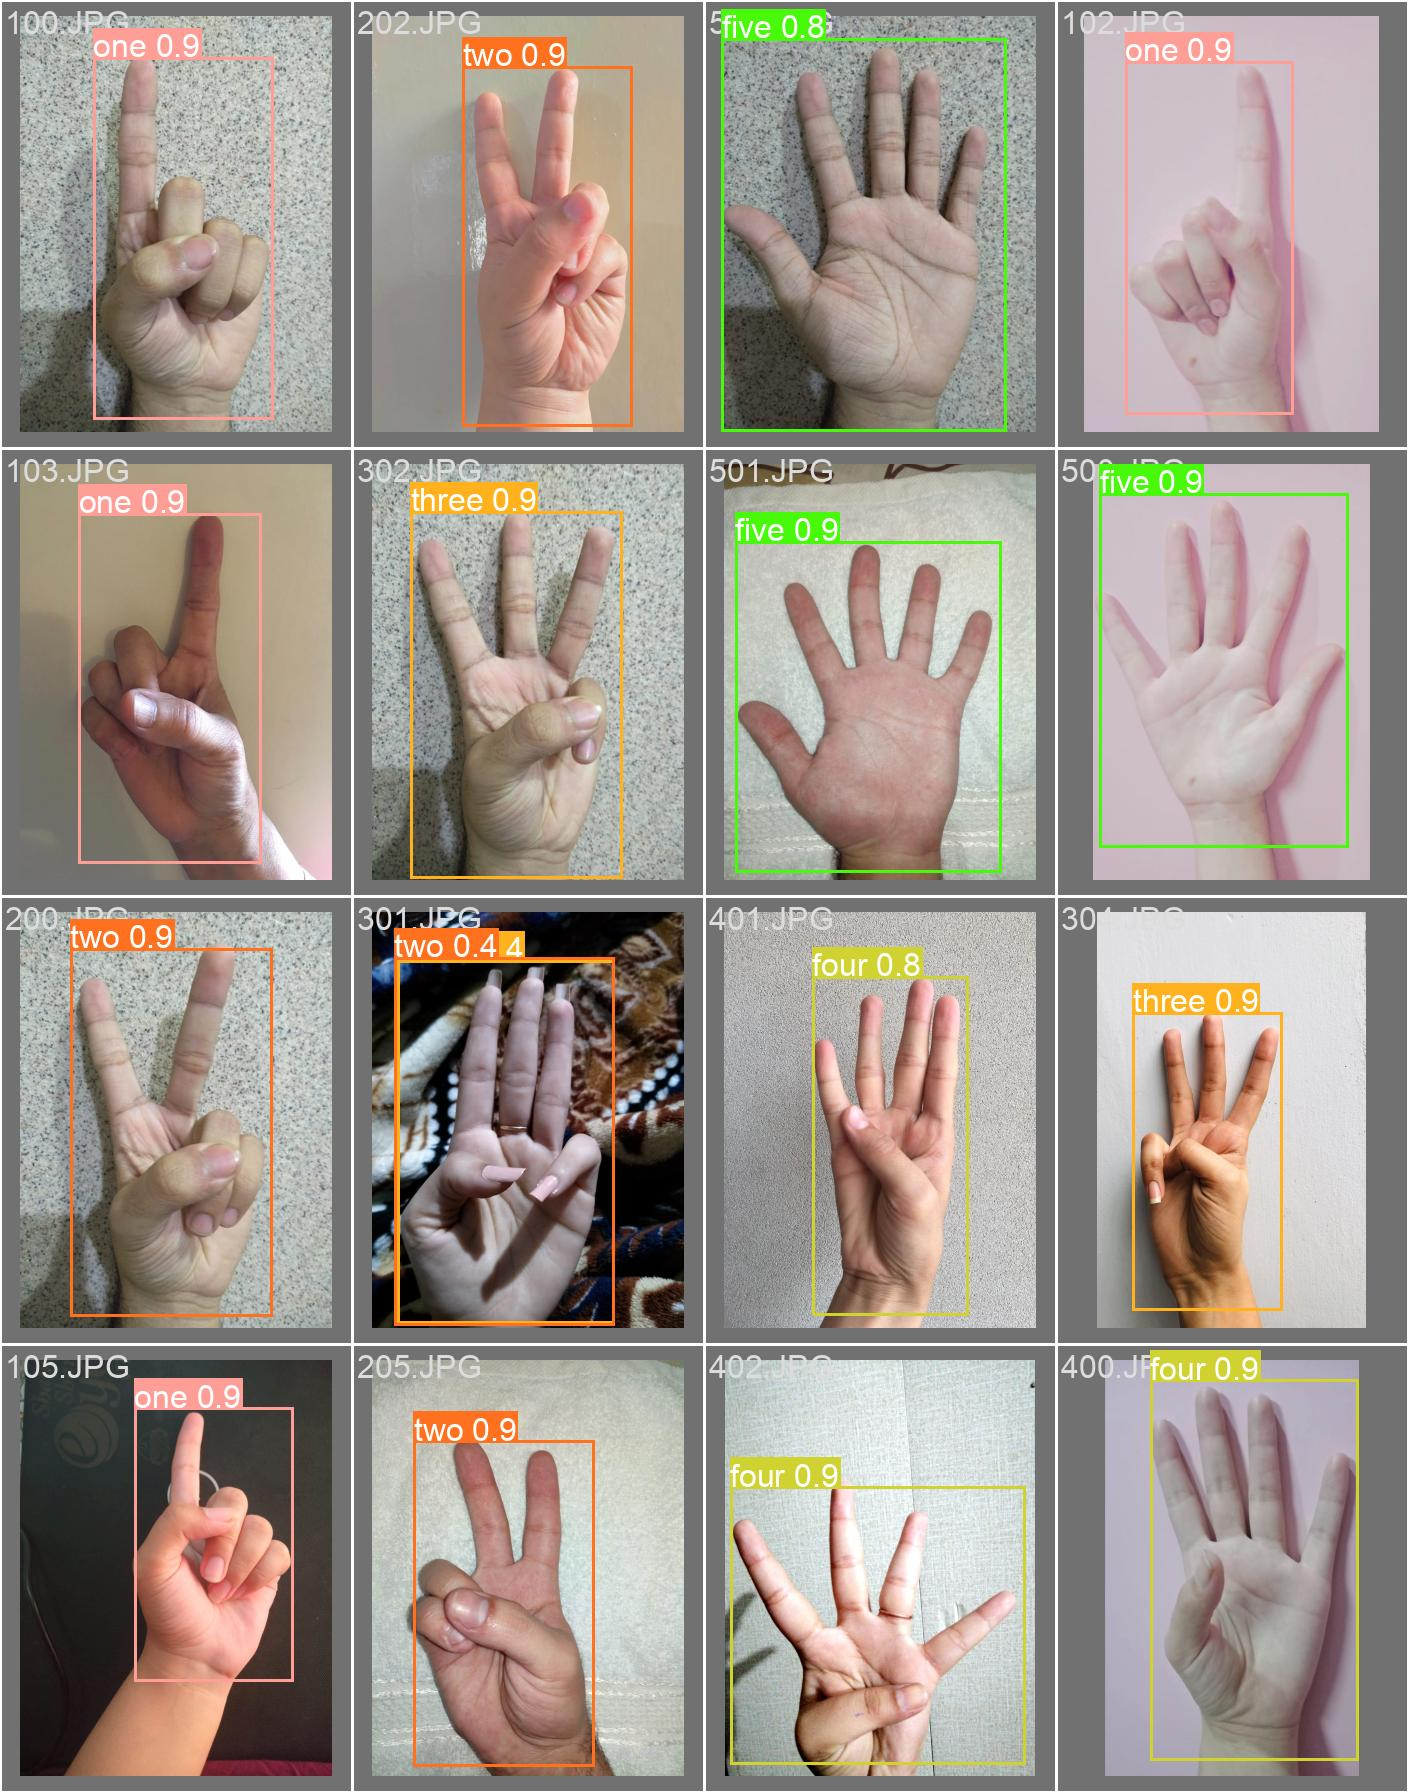

In [41]:
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results2/val_batch0_pred.jpg', width=1000)

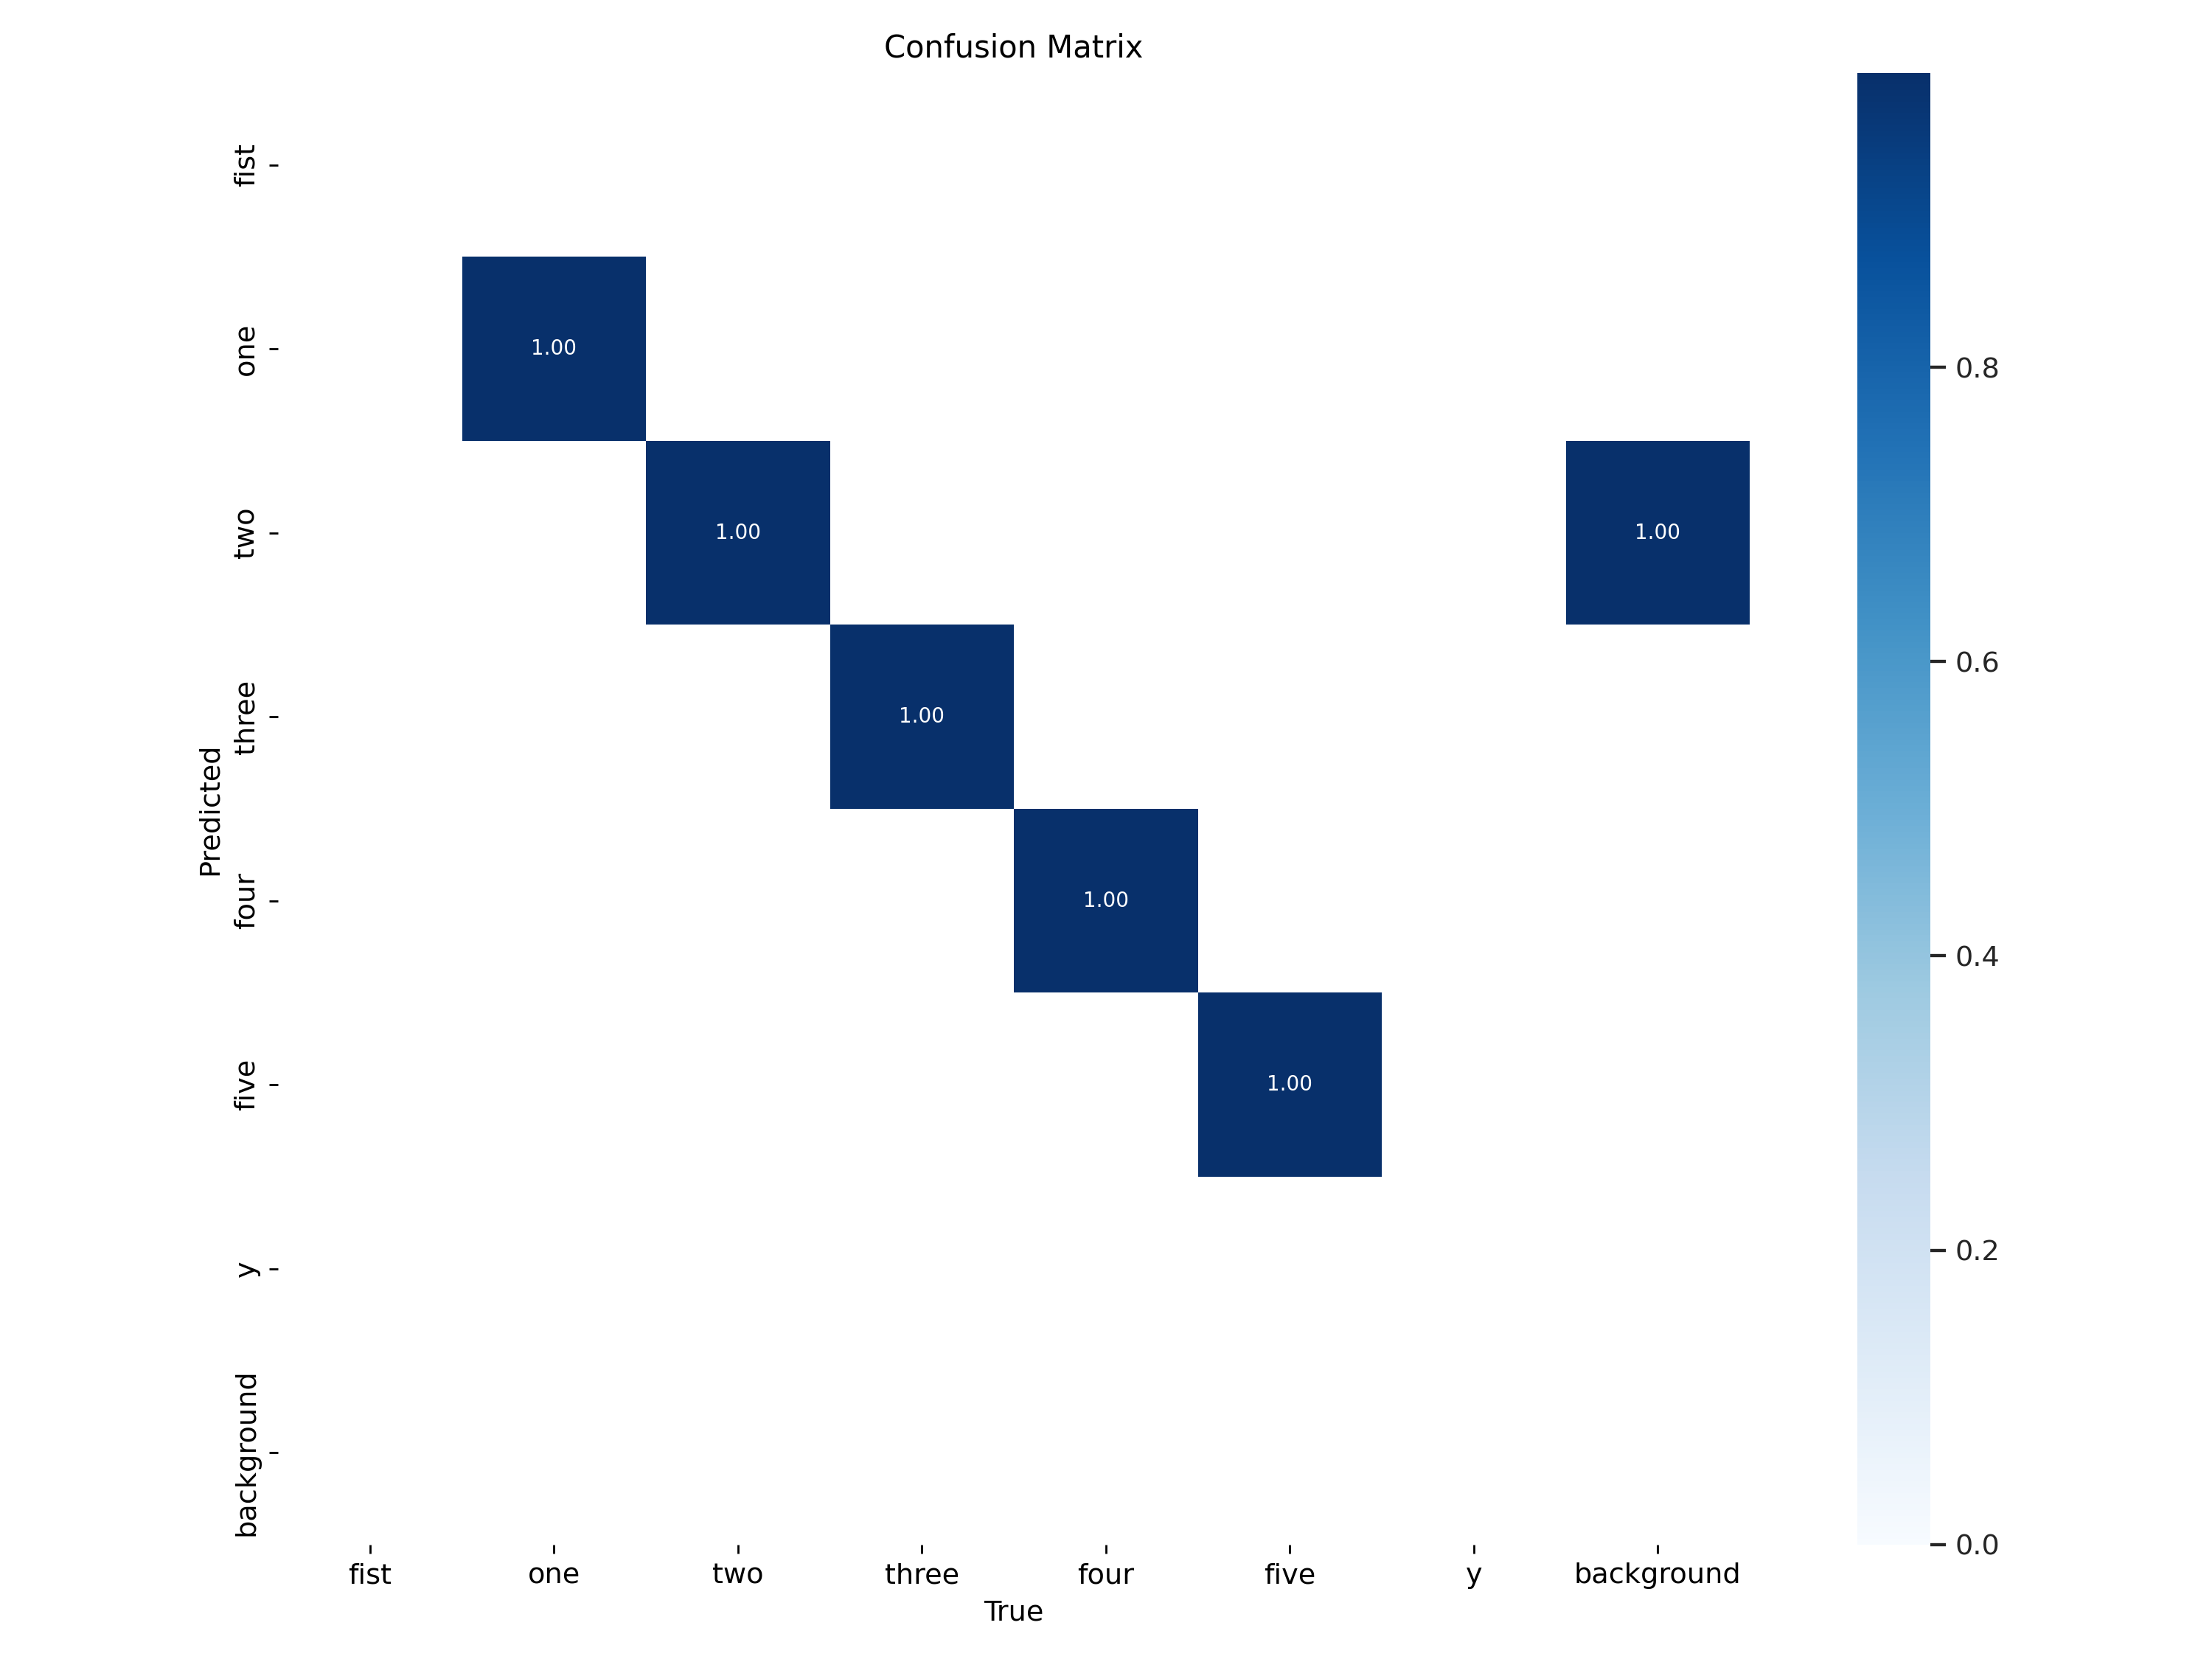

In [42]:
 
Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results2/confusion_matrix.png', width=1000)

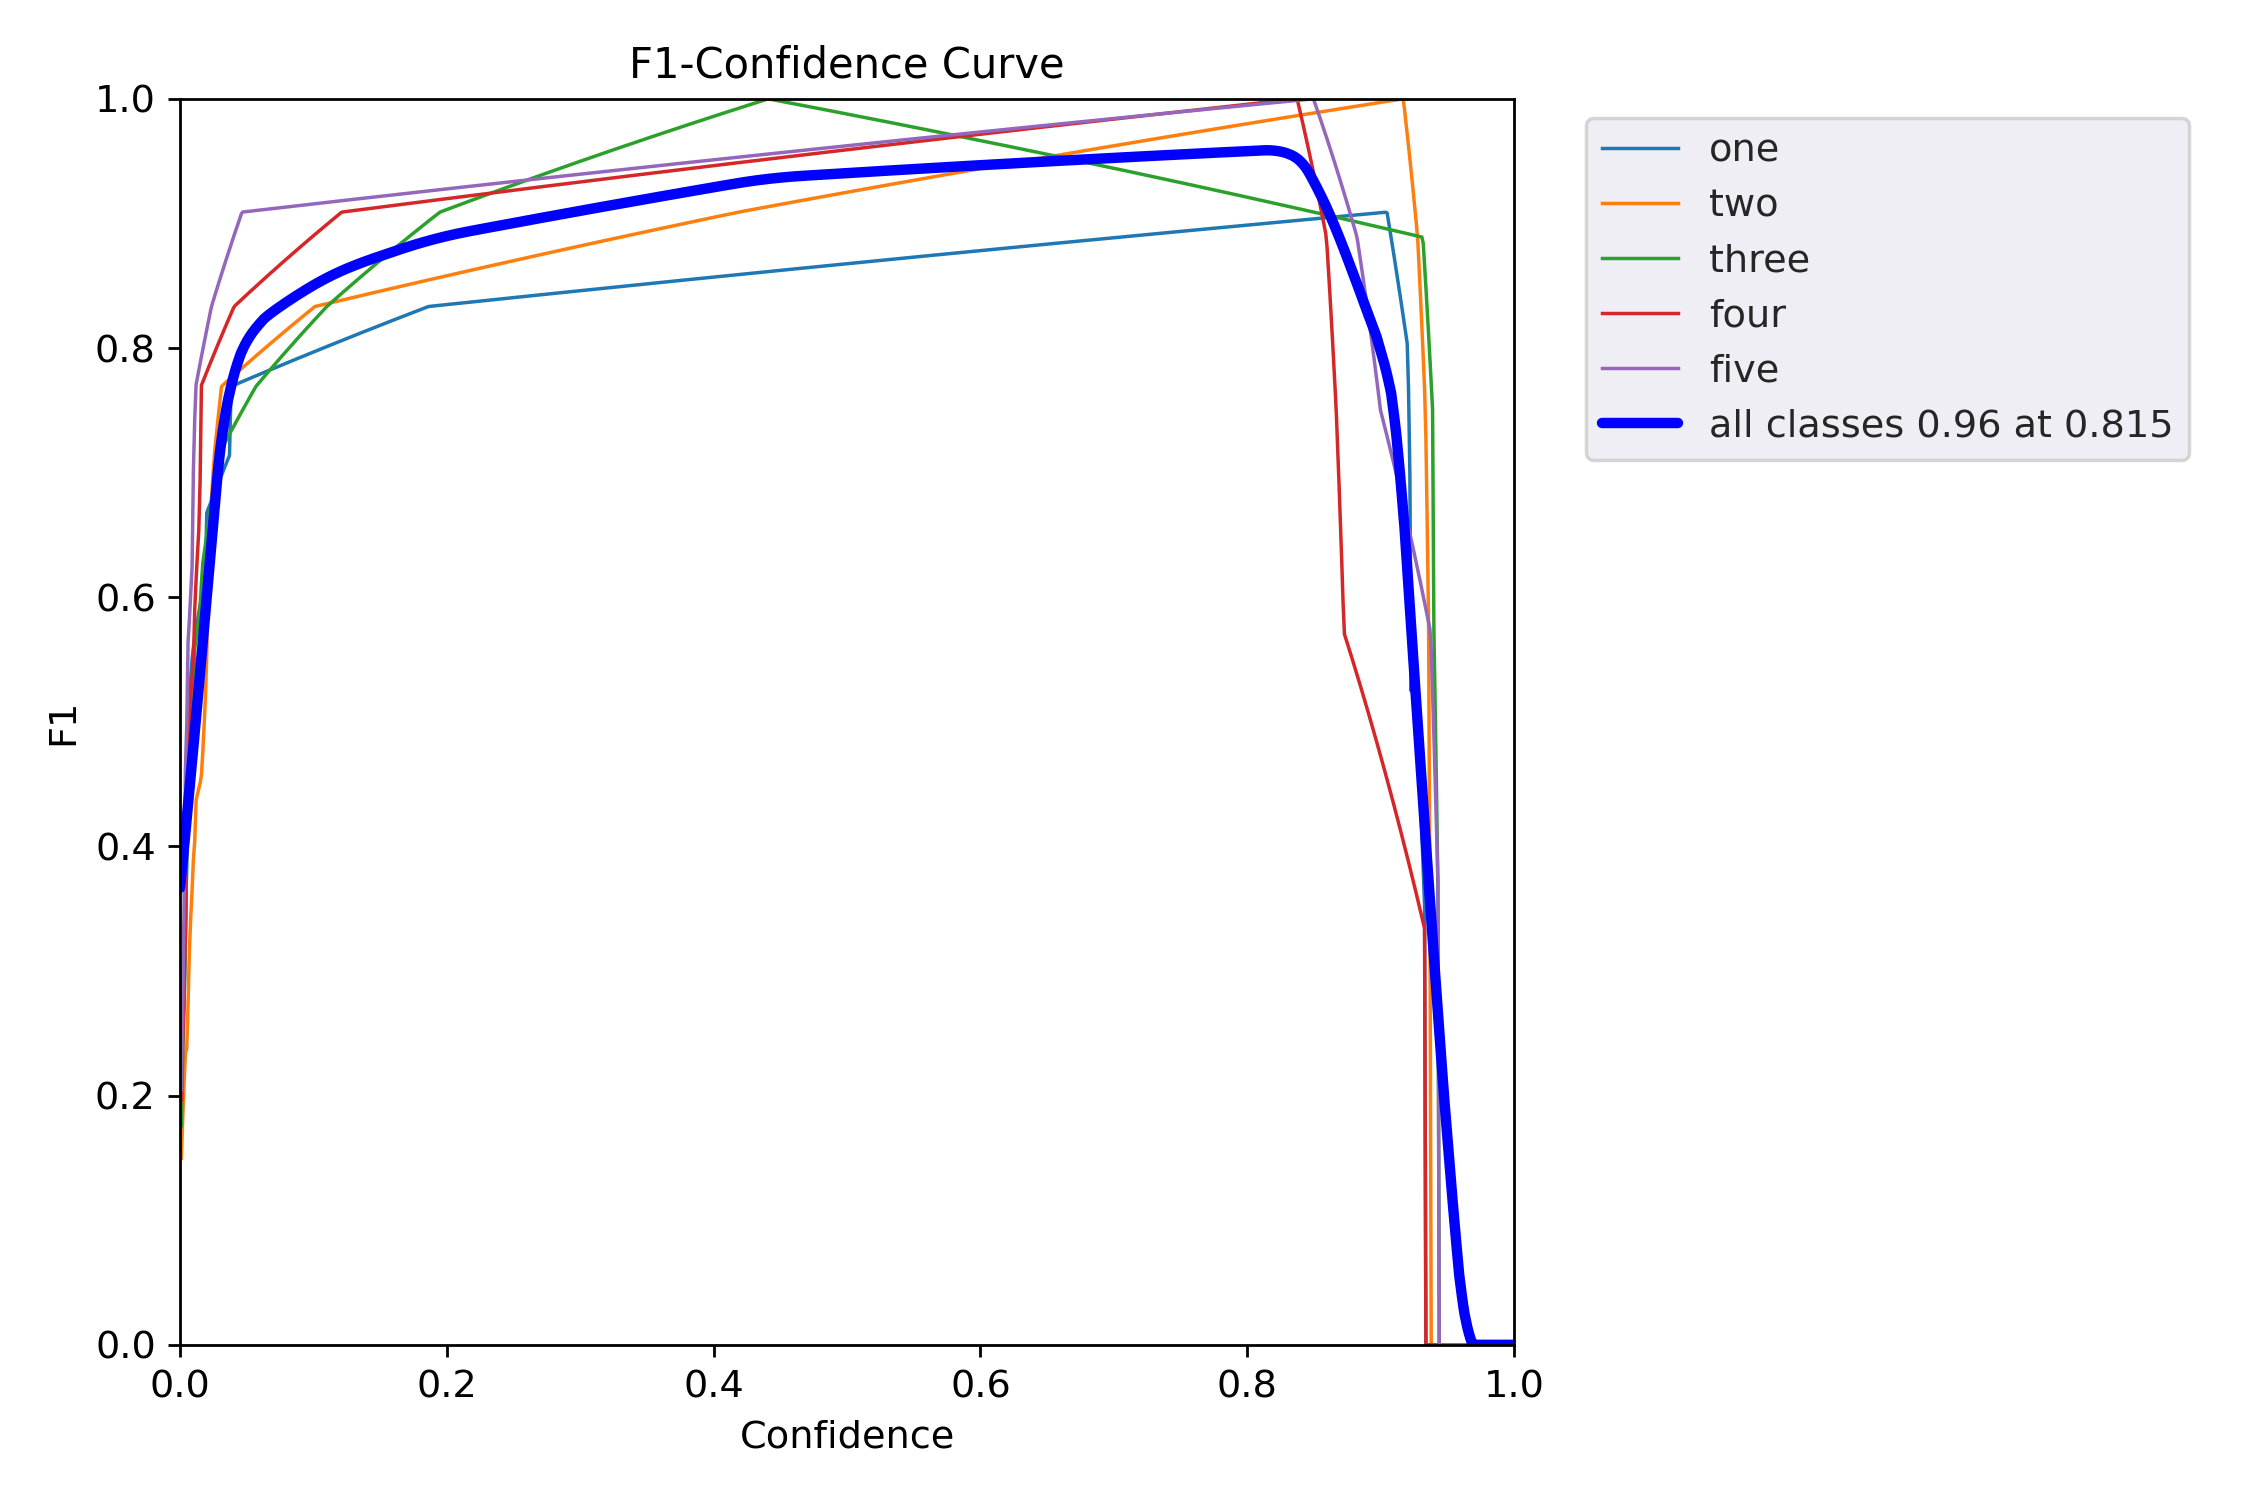

In [43]:

Image(filename='/kaggle/working/yolov5/runs/train/yolov5s_results2/F1_curve.png', width=1000)